# Backtest multiple models
Loads valuation model(s) and applies error handling to rank sectors and trade

In [230]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from keras import layers
import pandas_datareader as pdr
from datetime import datetime
from keras.models import load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform
import itertools
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform

from scipy.stats.mstats import gmean


In [2]:

NUM_INPUT_NEURONS = 64
NUM_OUTPUT_NEURONS = 1
DAY_OFFSET = 5

def from_network(symbol):
    return pdr.get_data_yahoo(symbols=symbol, start=datetime(1900, 1, 1)).sort_values(by=['Date'],ascending=False)

# Create features (only close price for now)
def convert_to_percentage(old, new):
    return (old - new) / old

def convert_labels_to_category(labels): 
    # Simplification - If positive return, 1, else 0
    # return map(lambda arr: 1 if arr[0] > 1 else 0, labels)
    # rounding simpliciation
    return map(lambda arr: map(lambda val: round(val,4),arr), labels)

def convert_to_train(raw_dataset, offset=5):
    dataset = raw_dataset.copy()
    features = []
    labels = []
    for i in range(offset, len(dataset) - NUM_INPUT_NEURONS):

        feature_dataset = dataset[i:i+NUM_INPUT_NEURONS].copy()
        latest_close = feature_dataset['Close'].iloc[0]
        
        features.append(
            feature_dataset['Close']
                .map(lambda current: convert_to_percentage(latest_close, current))
                .tolist()
        )
        labels.append([
            dataset['Close'].iloc[i-1] / latest_close, # 1 day trade
        ])
        
    # Without converting labels the precision is hard to determine accuracy. 
    # Rather than crude 0/1, maybe this can be more sophisticated
    labels = convert_labels_to_category(labels)
    
    return [features,labels]

def split_data(symbol):
    fetched = from_network(symbol)
    converted = convert_to_train(fetched)
    features = converted[0]
    labels = converted[1]
    training = [ # since we decide a model, use all data for training
        features[1:],
        labels[1:]
    ]
    validation = [
        features[5:1000],
        labels[5:1000]
    ]
    prediction = [
        features[:5],
        labels[:5],
    ]
    
    return {
        'symbol': symbol,
        'prediction': prediction,
        'validation': validation,
        'training': training,
    }

    
def combine_all(accum, prep):
    return {   
        'prediction':[
            accum['prediction'][0] + prep['prediction'][0],
            accum['prediction'][1] + prep['prediction'][1],
        ],
        'validation':[
            accum['validation'][0] + prep['validation'][0],
            accum['validation'][1] + prep['validation'][1],
        ],
        'training':[
            accum['training'][0] + prep['training'][0],
            accum['training'][1] + prep['training'][1],
        ],
    }


In [3]:
with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
    error_model = load_model('sector_model_error.h5')
    model = load_model('sector_model.h5')
    model_0 = load_model('sector_model_0.h5')
    model_1 = load_model('sector_model_1.h5')
    model_2 = load_model('sector_model_2.h5')
    model_3 = load_model('sector_model_3.h5')
    model_4 = load_model('sector_model_4.h5')
    model_5 = load_model('sector_model_5.h5')
    model_6 = load_model('sector_model_6.h5')
    model_7 = load_model('sector_model_7.h5')
    model_8 = load_model('sector_model_8.h5')
    model_9 = load_model('sector_model_9.h5')


In [4]:

QQQ = from_network('QQQ')
SPY = from_network('SPY')
XLK = from_network('XLK')
XLF = from_network('XLF')
XLE = from_network('XLE')
XLP = from_network('XLP')
XLV = from_network('XLV')
XLY = from_network('XLY')
XLI = from_network('XLI')
XLU = from_network('XLU')
DIA = from_network('DIA')
IWM = from_network('IWM')

In [5]:
securities_to_predict = [
    ['SPY', np.array(convert_to_train(SPY.copy(), 0)[0][:1])],
#     ['QQQ', np.array(convert_to_train(QQQ.copy(), 0)[0][:1])],
    ['XLE', np.array(convert_to_train(XLE.copy(), 0)[0][:1])],
    ['XLF', np.array(convert_to_train(XLF.copy(), 0)[0][:1])],
    ['XLK', np.array(convert_to_train(XLK.copy(), 0)[0][:1])],
    ['XLP', np.array(convert_to_train(XLP.copy(), 0)[0][:1])],
    ['XLV', np.array(convert_to_train(XLV.copy(), 0)[0][:1])],
    ['XLU', np.array(convert_to_train(XLU.copy(), 0)[0][:1])],
    ['XLY', np.array(convert_to_train(XLY.copy(), 0)[0][:1])],
    ['XLI', np.array(convert_to_train(XLI.copy(), 0)[0][:1])],
#     ['IWM', np.array(convert_to_train(IWM.copy(), 0)[0][:1])],
#     ['DIA', np.array(convert_to_train(DIA.copy(), 0)[0][:1])],

]


In [33]:
map(generate_model_predictions,[model, model_1, model_2, model_3, model_4,model_5,model_6,model_7,model_8,model_9,model_0])

['XLK', 'XLE', 'XLP', 'XLY', 'SPY', 'XLV', 'XLF', 'XLI', 'XLU']
['XLK', 'XLI', 'XLF', 'XLY', 'SPY', 'XLU', 'XLE', 'XLV', 'XLP']
['XLE', 'XLK', 'XLU', 'XLP', 'XLI', 'XLV', 'SPY', 'XLF', 'XLY']
['XLI', 'XLY', 'XLV', 'XLE', 'XLP', 'SPY', 'XLU', 'XLK', 'XLF']
['XLE', 'XLY', 'XLK', 'XLI', 'XLU', 'XLV', 'SPY', 'XLP', 'XLF']
['XLU', 'XLP', 'XLV', 'XLI', 'SPY', 'XLF', 'XLK', 'XLY', 'XLE']
['XLE', 'XLK', 'XLP', 'XLF', 'XLV', 'XLU', 'XLY', 'XLI', 'SPY']
['XLY', 'XLP', 'XLI', 'SPY', 'XLU', 'XLF', 'XLV', 'XLK', 'XLE']
['SPY', 'XLI', 'XLF', 'XLK', 'XLY', 'XLV', 'XLP', 'XLE', 'XLU']
['XLE', 'XLP', 'XLK', 'XLV', 'XLY', 'SPY', 'XLU', 'XLF', 'XLI']
['XLK', 'XLI', 'XLF', 'XLY', 'SPY', 'XLP', 'XLU', 'XLE', 'XLV']


[None, None, None, None, None, None, None, None, None, None, None]

In [47]:
SPY_TRAIN = convert_to_train(SPY.copy(), 0)
XLE_TRAIN = convert_to_train(XLE.copy(), 0)
XLF_TRAIN = convert_to_train(XLF.copy(), 0)
XLK_TRAIN = convert_to_train(XLK.copy(), 0)
XLP_TRAIN = convert_to_train(XLP.copy(), 0)
XLV_TRAIN = convert_to_train(XLV.copy(), 0)
XLU_TRAIN = convert_to_train(XLU.copy(), 0)
XLY_TRAIN = convert_to_train(XLY.copy(), 0)
XLI_TRAIN = convert_to_train(XLI.copy(), 0)


```
Perhaps creating a policy which takes the aggregate score 0-1 to create a normalized ranking for an item and trading it as a softmax of the portfolio?
```

In [349]:
records = []
account = 1
leverage = 1
for x, y in zip(range(5,200), itertools.count()):
    securities_to_predict = [
#         ['SPY', np.array(SPY_TRAIN[0][x:x+1]),np.array(SPY_TRAIN[1][x:x+1])],
        ['XLE', np.array(XLE_TRAIN[0][x:x+1]),np.array(XLE_TRAIN[1][x:x+1])],
        ['XLF', np.array(XLF_TRAIN[0][x:x+1]),np.array(XLF_TRAIN[1][x:x+1])],
        ['XLK', np.array(XLK_TRAIN[0][x:x+1]),np.array(XLK_TRAIN[1][x:x+1])],
        ['XLP', np.array(XLP_TRAIN[0][x:x+1]),np.array(XLP_TRAIN[1][x:x+1])],
        ['XLV', np.array(XLV_TRAIN[0][x:x+1]),np.array(XLV_TRAIN[1][x:x+1])],
        ['XLU', np.array(XLU_TRAIN[0][x:x+1]),np.array(XLU_TRAIN[1][x:x+1])],
        ['XLY', np.array(XLY_TRAIN[0][x:x+1]),np.array(XLY_TRAIN[1][x:x+1])],
        ['XLI', np.array(XLI_TRAIN[0][x:x+1]),np.array(XLI_TRAIN[1][x:x+1])],
    ]

    def print_arg(arr):
        print '{} {}'.format(arr[0],str(arr[1]))


    def predict_and_correct(model, inputs):
        prediction = model.predict(inputs)
        return prediction

    def generate_model_predictions(model):
        predictions = map(lambda arr: [arr[0], predict_and_correct(model,arr[1])], securities_to_predict)
        predictions.sort(key=lambda x: x[1],reverse=True)
#         print map(print_arg, predictions)
#         print map(lambda arr: arr[0],predictions)
        return predictions
    
    all_model_predictions = map(generate_model_predictions,[model, model_1, model_2, model_3, model_4,model_5,model_6,model_7,model_8,model_9,model_0])

    def ranking_for_symbol(symbol):
        return map(lambda predictions: map(lambda arr: arr[0],predictions).index(symbol),all_model_predictions)

    securities_to_predict.sort(key=lambda x: np.median(ranking_for_symbol(x[0])))

    
    buy_ranking = map(lambda x: x[2],
                      filter(lambda x: np.median(ranking_for_symbol(x[0])) <= 2, securities_to_predict[:4]))
    buy = np.mean(buy_ranking) # long
    
    sell_ranking = map(lambda x: x[2],
                            filter(lambda x: np.median(ranking_for_symbol(x[0])) >= 5, securities_to_predict[4:]))
    sell = 1+(1-np.mean(sell_ranking)) # short
    
    buy = buy if not np.isnan(buy) and len(buy_ranking) > 0 and len(sell_ranking) > 0 else 1
    sell = sell if not np.isnan(sell) and len(buy_ranking) > 0 and len(sell_ranking) > 0 else 1


    change = ((buy + sell) / 2) - 1
    if change != 0 and False:
        print 'result ranking'
        print map(lambda x: x[0],securities_to_predict)
        for security in securities_to_predict:
            print security[0],security[2],np.median(ranking_for_symbol(security[0])),ranking_for_symbol(security[0])
        print 'Buy',buy
        print 'Sell',sell
        print 'Change', change
    account = account + (change*leverage)
    records.append(account)
#     print 'Account', account
print 'End Account', account



End Account 1.1224541666666672


In [350]:
print 'End Account', account


End Account 1.1224541666666672


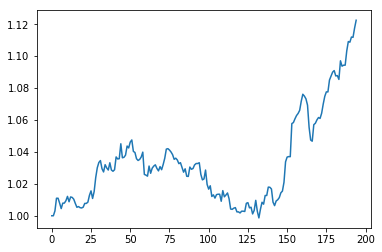

In [351]:
plt.plot(records)

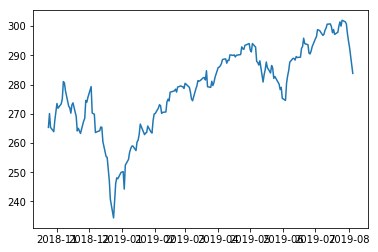

In [352]:
plt.plot(SPY.copy()[5:200]["Close"])

In [348]:
(1.2+.9) /2

1.05